# US Accidents Exploratory Data Analysis

### Todo - Talk about EDA
### Todo - Talk about Dataset (Source, What it countains, How it will be usefull)
    - Kaggle
    - Information about accidents
    - Can be useful to prevent accidents

##  1) Data Prepration and Cleaning
    1. Load the files using Pandas
    2. Look at some information about data and columns
    3. Fix any missing and incorrect values

In [1]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_filename = 'D:/Downloads/US_Accidents_Dec21_updated.csv'
df = pd.read_csv(data_filename)

In [3]:
df.shape

(2845342, 47)

In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nemeric_df = df.select_dtypes(include=numerics)
len(nemeric_df.columns)

14

#### Percentage of missing Vlaues per Column

In [8]:
missing_percentages = df.isnull().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [9]:
missing_percentages[missing_percentages != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

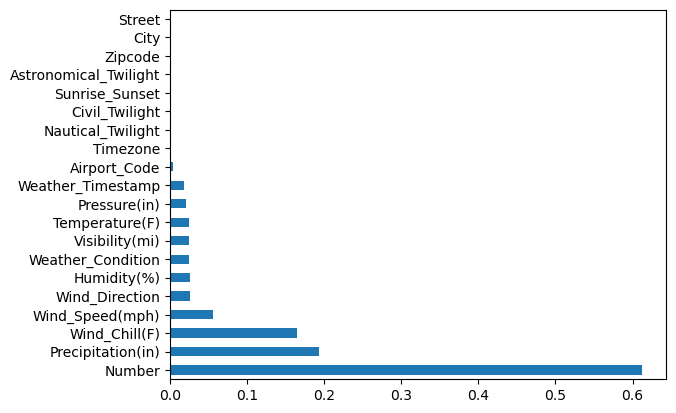

In [10]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

#### Remove Columns that we do not want to use.

In [11]:
df = df.drop(['Number','Wind_Chill(F)'],axis=1)

## 2) Exploratory Analysis and Visulization

### Columns we will Analyse:
    1. City
    2. Start Time
    3. Start Lat, Start Lng
    4. Temperature


In [12]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [13]:
cities = df.City.unique()
len(cities)

11682

In [14]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [15]:
cities_by_accidents[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

<AxesSubplot:>

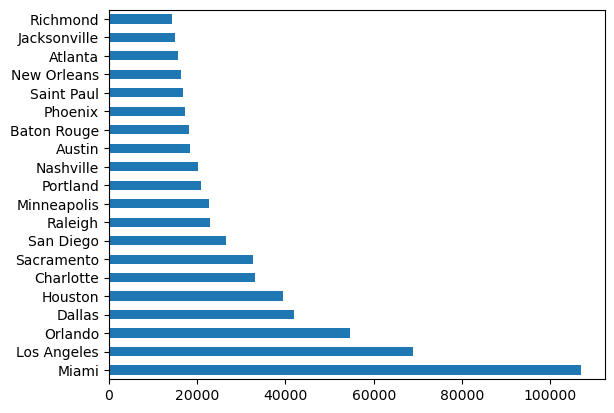

In [16]:
cities_by_accidents[:20].plot(kind="barh")

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

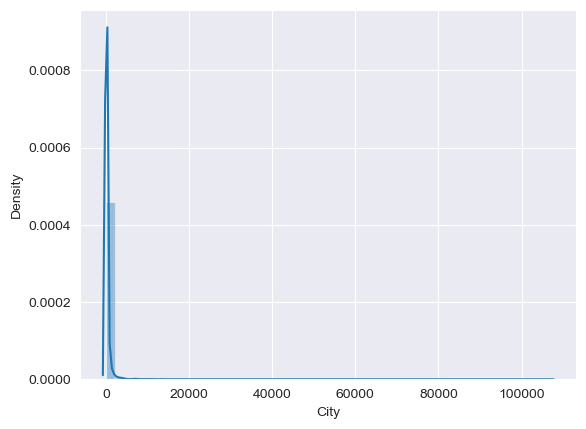

In [86]:
sns.distplot(cities_by_accidents)

In [19]:
high_accident_cities = cities_by_accidents[cities_by_accidents > 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents <1000]

In [20]:
# Percent of high accident cities
len(high_accident_cities) / len(cities)*100

4.228727957541517

<AxesSubplot:xlabel='City', ylabel='Count'>

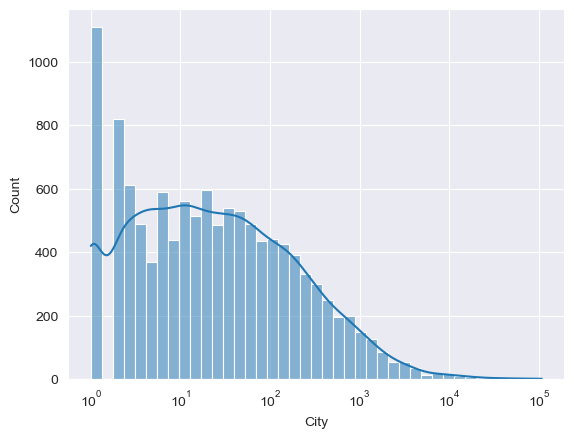

In [21]:
sns.histplot(cities_by_accidents,log_scale=True,kde=True)

In [22]:
cities_by_accidents[cities_by_accidents == 1].sum()

1110

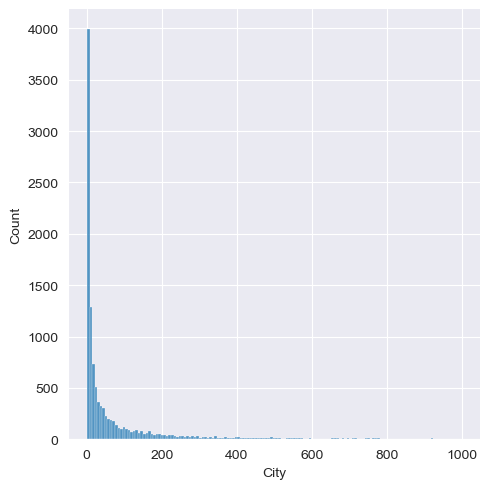

In [23]:
sns.displot(low_accident_cities)

### Start Time

In [24]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [25]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

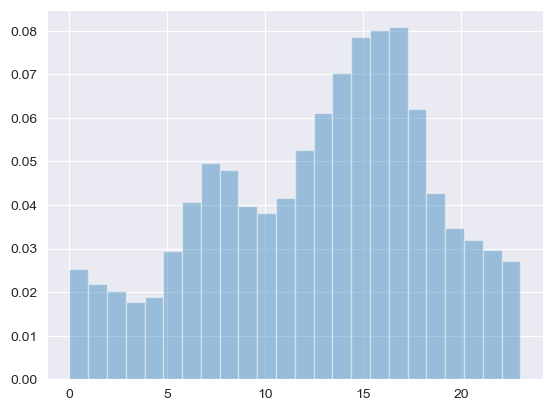

In [26]:
sns.distplot(x=df.Start_Time.dt.hour,bins=24, kde=False, norm_hist=True)

#### - A higher percentage of accidents occure between 6 AM - 10 PM (People maybe in hurry to go to work)
#### - A highest percentage of accidents occure within 3 PM - 6 PM (Probably traffic was higher because people getting back from work)


<AxesSubplot:xlabel='Start_Time'>

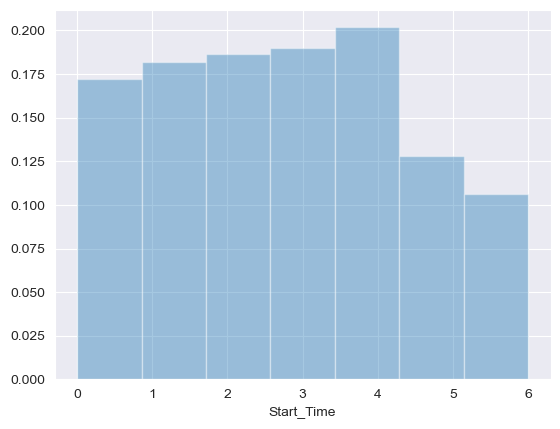

In [27]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

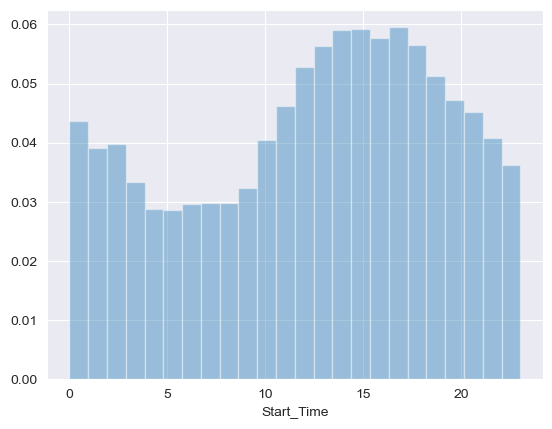

In [28]:
# Accidents On Sundays
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour,bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

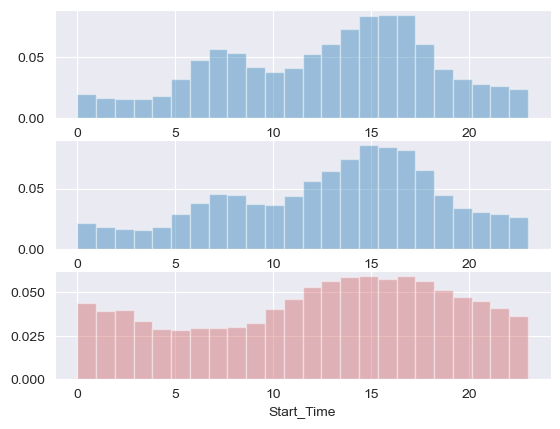

In [29]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
Friday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 4]

f, (axis1,axis2,axis3) = plt.subplots(3,1)

sns.distplot(x=monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True,ax=axis1)
sns.distplot(x=Friday_start_time.dt.hour,bins=24,kde=False,norm_hist=True,ax=axis2)
sns.distplot(sunday_start_time.dt.hour,bins=24, kde=False, norm_hist=True,color='indianred')

### On Weekends, peak occurs between 10PM to 8AM, unlike week days.

<AxesSubplot:xlabel='Start_Time'>

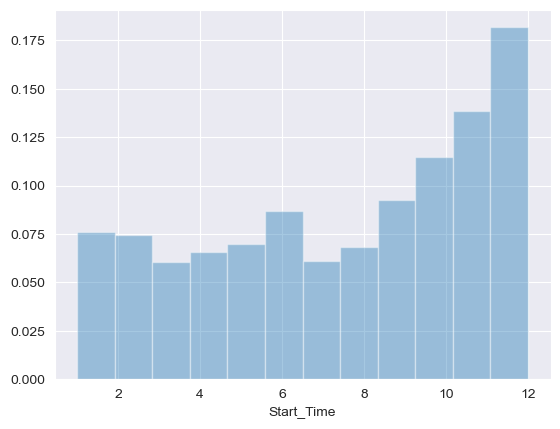

In [30]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

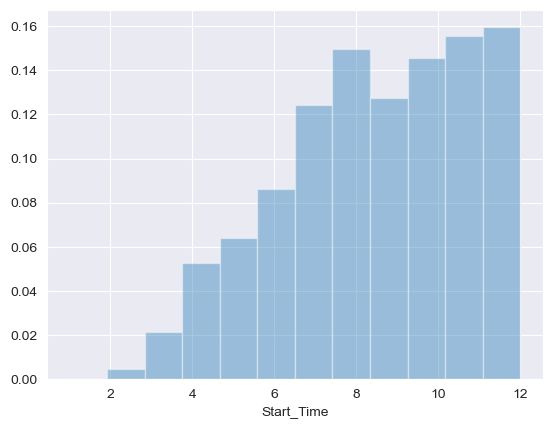

In [31]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month,bins=12,norm_hist=True,kde=False)

### Much data is missing in 2016, maybe in 2017.

### Start Latitude & Start Longitude

In [32]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [33]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [34]:
sample_df = df.sample(int(0.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

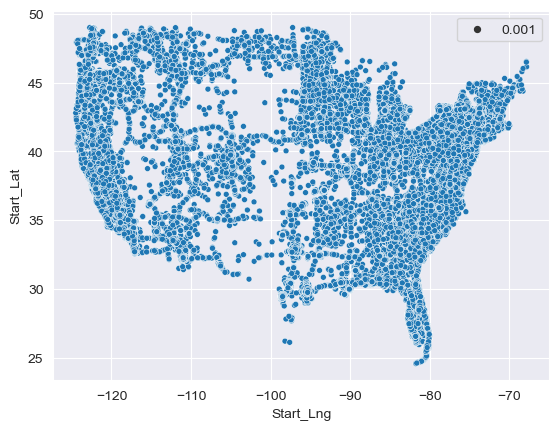

In [35]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat, size=0.001)

In [36]:
import folium
from folium.plugins import HeatMap

In [37]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [38]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map


## 3) Ask and Answer Questions

     1. Are there more Accidents in warmer or colder temperature?  
     2. Which 5 states have highest number of Accidents?
     3. Does New York show up in the data? If yes, why the count is lower even when the most populated city.
     4. What time of the day have accidents most frequent in?
     5. Which days of the week have the most accidents?
    

###  1) Are there more Accidents in warmer or colder areas?  
    - Temperature is in Ferhanite 

In [39]:
df['Temperature'] = df['Temperature(F)']

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

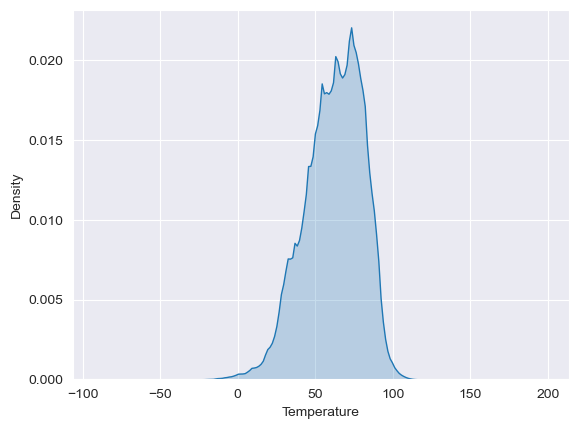

In [40]:
sns.kdeplot(x=df.Temperature,shade=True)

### Answer - Accidents mostly occure in Warm temperature.

###   2) Which 5 states have highest number of Accidents?


In [41]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [42]:
df_top5= df.State.value_counts().sort_values(ascending=False)[:5]
df_top5

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

<AxesSubplot:>

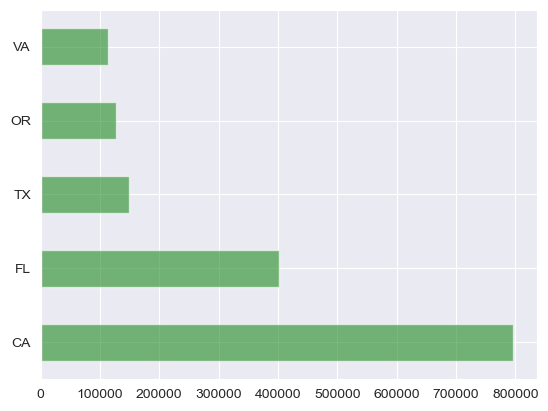

In [67]:
df_top5.plot(kind='barh',color="forestgreen",alpha=0.6)

### Answer - States with most accidents are California(CA), Florida(FL), Texas(TX), Oregon(OR) and Virginia(VA)

### 3. Does New York show up in the data? If yes, why the count is lower even when the most populated city.


In [44]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Temperature'],
      dtype='object')

In [50]:
df.City['New York']

KeyError: 'New York'

### Answer - New York Is not present in the dataset, it questions the relaiblity of data source as New York most populated country

###  4) What time of the day have accidents most frequent in?



In [69]:
# We have already changed the Time dtype to datetime
df["Start_Time"]

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

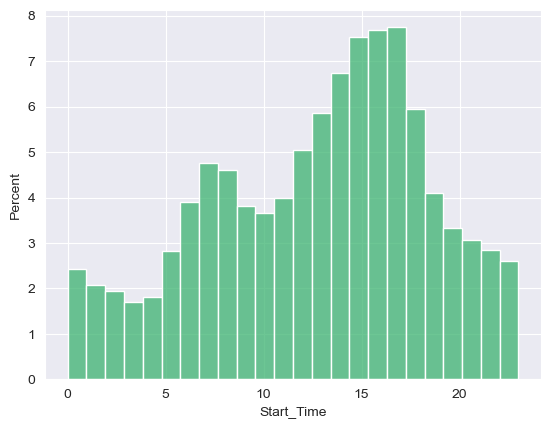

In [61]:
# Created histogram extracting Hour from the time and put them in 24 Bins for 24 Hours, kept stat as percent to normalize y-asis
sns.histplot(df.Start_Time.dt.hour,bins=24, kde=False,color='mediumseagreen',stat='percent')

### Answer: Most of the Accidents are between 1PM to 3PM

###  5) Which day of the week have the most accidents? 

In [70]:
df["Start_Time"]

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [72]:
df.Start_Time.dt.dayofweek

0          0
1          0
2          0
3          0
4          0
          ..
2845337    4
2845338    4
2845339    4
2845340    4
2845341    4
Name: Start_Time, Length: 2845342, dtype: int64

<AxesSubplot:xlabel='Start_Time'>

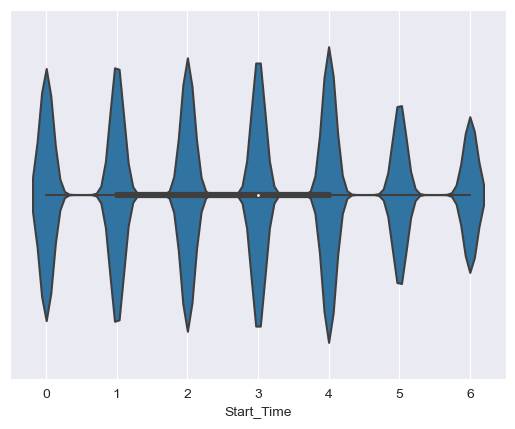

In [76]:
sns.violinplot(x=df.Start_Time.dt.dayofweek)

### Answer: Accidents are consistent on weekdays, most accidents are likely to happen on Fridays. 

## 4) Summary and Conclusion
#### Insights:
    - Less than 5% of Cities have more than 1000 yearly accidents.
    - The Number of accidents per city increases/decreases exponentially
    - Over 1100 cities have reported just 1 accident (Need to investigate).

## - We can also answer questions like:

    - Which month have the most accidents?
    - What is the trend of accidents year over year?
    - Where is accident per unit of trafic is highest?

## - More areas of Analysis can be:
    
    - Accidents related to Weather Conditions
    - Analysis of Description using Word Cloud Analysis